#description
In this notebook we only make the preprocessing feature generation (only can be done on test and train concatenated without leakage)



1.   First look to the data see what i contains you can see that I've add some comments for planning , I used only some of them , I used a lot of help from the notebooks in kaggle
2.   Categorical feature
  there is the standad and some extra like city and subtype all og them get encoded as label encoder from scikit learn 

3.   I've transfered data to time from string then I didn't use it at all 
4.   feature from text

  here I 've used the tfidf and NMF to reduce the representation , I've tried to do this step at the end but my memory couldn't fit all of the data so I did before 
5.   EDA ,I've tried to understand the dataset It was quite fun ,finding these insights all of them commented 
6.   prepare for lagged feature

  lagged feature is using the label from previous months as a feature so if we can concatenated both training and testing we can make it once and it's easier 
  same goes for trend feature 
7.   trend feature 

  same as lagged feature 

8.   draft

  extra trails if you want to look at 







#downloading data_set

In [ ]:
from google.colab import output

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c competitive-data-science-predict-future-sales
!unzip items.csv.zip 
!unzip sales_train.csv.zip
!rm /content/sample_submission.csv.zip
!rm kaggle.json
!rm items.csv.zip 
!rm sales_train.csv.zip
!unzip test.csv.zip
!rm test.csv.zip 
output.clear()


#read_data_set

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# sns.set(style="ticks")


sales_train=pd.read_csv("sales_train.csv")
item_categories=pd.read_csv("item_categories.csv")
items=pd.read_csv("items.csv")
shops=pd.read_csv("shops.csv")
test=pd.read_csv("test.csv")


#First look 
- It's expected to predict sales items_cnt_sales

- shop id , item id is catigorical data
  - label encoding 

- date is date 
  - tranfer from object type to date 

- date block is considered time since in date lecture 

- item price is numeical 
  - min max scaler




In [ ]:
print("sales")
print(sales_train.head())
print("*"*80)
print("item categories")
print(item_categories.head())
print("*"*80)
print("items ")
print(items.head())
print("*"*80)
print("shops")
print(shops.head())
print("*"*80)
print("test")
print(test.head())

sales
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
********************************************************************************
item categories
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
********************************************************************************
items 
                                           item_name  item_id  item_category_id
0          ! ВО

# features 

some of the features need to be made on training then applying to validation then test like tfidf and it's interaction ,mean encoding  

some need to concat both and applying on both of them on the same time , it's the lagging features only 



# transfer date to datetime

In [ ]:
print(sales_train.head())
print(sales_train.info())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


In [ ]:
sales_train["date_block_num"]=sales_train["date_block_num"].astype(np.int8)
sales_train["shop_id"]=sales_train["shop_id"].astype(np.int8)
sales_train["item_id"]=sales_train["item_id"].astype(np.int16)
print(sales_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int8   
 2   shop_id         int8   
 3   item_id         int16  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int16(1), int8(2), object(1)
memory usage: 78.4+ MB
None


#categorical features 
- we have two tables to extract it from 
  - shops 
   - city shop name 
   - so we are going to split the city and the shop name so we can increase our featuers 
   -label encoding for the city ,shop name is already encoded 
  - item id 
  - item category name
   - item - type
   - so we gonne label encode the type  



In [ ]:
from sklearn.preprocessing import LabelEncoder
# shops=pd.read_csv("shops.csv")

shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
print(shops.head())
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])

# shops = shops[['shop_id','city_code']]

                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4


In [ ]:
# item_categories=pd.read_csv("item_categories.csv")

print(item_categories.head())
item_categories['temp'] =item_categories['item_category_name'].str.split('-')
item_categories['type'] = item_categories['temp'].map(lambda x: x[0].strip())

item_categories['sub_type'] = item_categories['temp'].map(lambda x: x[1].strip() if len(x)>1 else 'non')
item_categories['type_code'] = LabelEncoder().fit_transform(item_categories['type'])
item_categories['subtype_code'] = LabelEncoder().fit_transform(item_categories['sub_type'])


print(item_categories.head())
# item_categories=item_categories[['type_code','subtype_code',"item_category_id"]]
print(item_categories.head())


        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
        item_category_name  item_category_id  ... type_code subtype_code
0  PC - Гарнитуры/Наушники                 0  ...         0           29
1         Аксессуары - PS2                 1  ...         1            9
2         Аксессуары - PS3                 2  ...         1           10
3         Аксессуары - PS4                 3  ...         1           11
4         Аксессуары - PSP                 4  ...         1           13

[5 rows x 7 columns]
        item_category_name  item_category_id  ... type_code subtype_code
0  PC - Гарнитуры/Наушники                 0  ...         0           29
1         Аксессуары - PS2                 1  ...         1            9
2         Аксессуары - PS3                 2  ...  

#EDA

## Target Variable analysis

In [ ]:
train2=sales_train
train3 = pd.merge(train2, shops, on=['shop_id'], how='left')
train3 = pd.merge(train3, items, on=['item_id'], how='left')
train3 = pd.merge(train3, item_categories, on=['item_category_id'], how='left')

In [ ]:
train3.describe().T
# we can notice that there is an item price with -1 

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0
city_code,2935849.0,16.170687,7.554980,0.0,13.0,13.0,23.0,30.0
item_category_id,2935849.0,40.001383,17.100759,0.0,28.0,40.0,55.0,83.0
type_code,2935849.0,9.872360,3.499719,0.0,8.0,11.0,13.0,19.0
subtype_code,2935849.0,19.916797,19.418985,0.0,4.0,11.0,37.0,58.0


## obvioiusly there is an outlier with price =300000




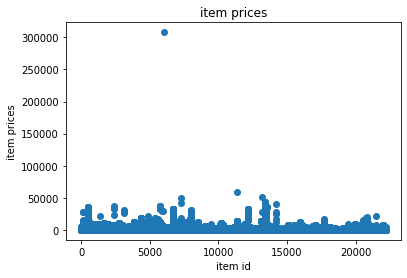

In [ ]:

# sales_train.item_price.unique().plot()
# Load the example dataset for Anscombe's quartet
# df = sns.load_dataset("anscombe")

x = train3.item_id
y = train3.item_price
plt.scatter(x,y)
plt.xlabel("item id")
plt.ylabel("item prices")
plt.title('item prices')
plt.show()


you can deduce from the coming two graph that the items with less prices is more than th high prices items

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


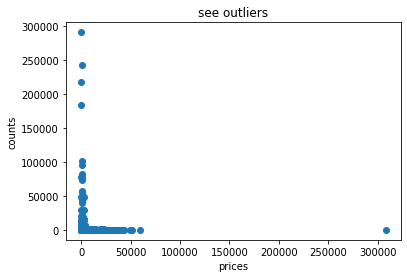

In [ ]:
import seaborn as sns

unique_prices,counts=np.unique(y,return_counts=True)
plt.scatter(unique_prices,counts)
plt.xlabel("prices")
plt.ylabel("counts")
plt.title('see outliers')
plt.show()

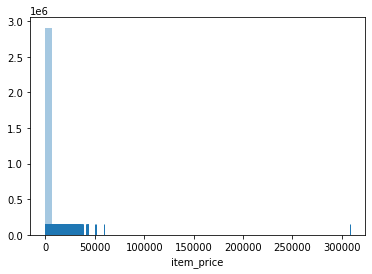

In [ ]:
sns.distplot(sales_train.item_price, kde=False, rug=True);
#sp surely there is an outlier at 3000000

In [ ]:
np.unique(train3.city_code)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

the items with id less than 10000 is a lot more , may be it's with lowest prices

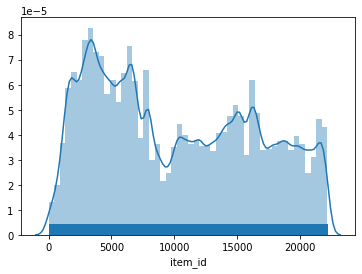

In [ ]:
# np.unique(train3.item_id)
sns.distplot(sales_train.item_id, kde=True, rug=True);
#there is some trending between 0 and 5000

## distribution of the cosumbtion of the cities 



*   there a huge cosumbition in city with id 13
*   It's more obvious from the heatmap





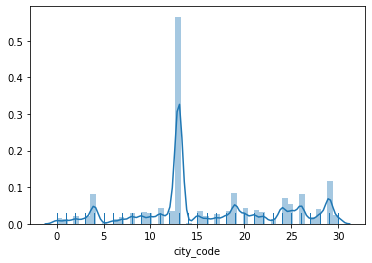

In [ ]:
sns.distplot(train3.city_code, kde=True, rug=True);
#surely city with 13 code is the capital or some thing like that , so much 

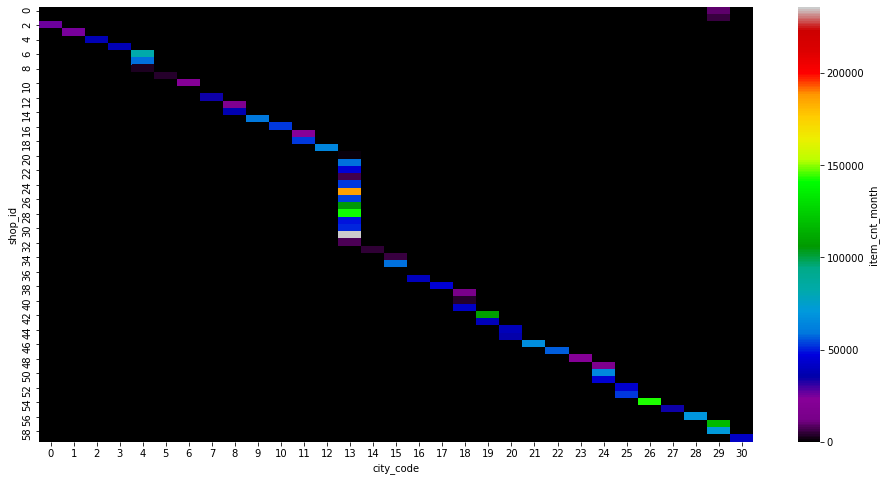

In [ ]:
temp = train3.groupby(['date_block_num','city_code']).agg({'item_cnt_day': ['sum']})
temp.columns=['item_cnt_month']
temp.reset_index(inplace=True)
cols = ['date_block_num','city_code']

train3 = pd.merge(train3, temp, on=cols, how='left')
train3['item_cnt_month'] = (train3['item_cnt_month'].fillna(0).clip(0,20).astype(np.float16))

stores_hm = train3.pivot_table(index='shop_id', columns='city_code', values='item_cnt_month', aggfunc='count', fill_value=0)
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(stores_hm, cmap='nipy_spectral', ax=ax, cbar=True, cbar_kws={'label': 'item_cnt_month'});

## largest category


*   you can see that category with id 40 has more items in it



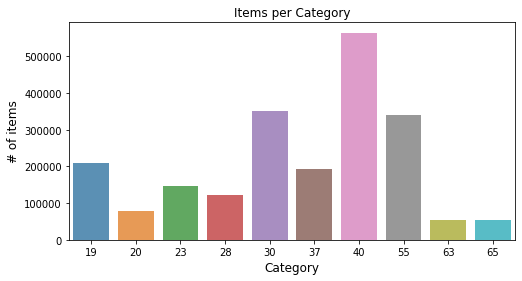

In [ ]:
1.0
x=train3.groupby(['item_category_id']).count()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.item_category_id, x.item_id, alpha=0.8)
plt.title("Items per Category")
plt.ylabel('# of items', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()


## Target Variable Analysis
*   there a negative trend 
*   there is seasonal at 10 , 23



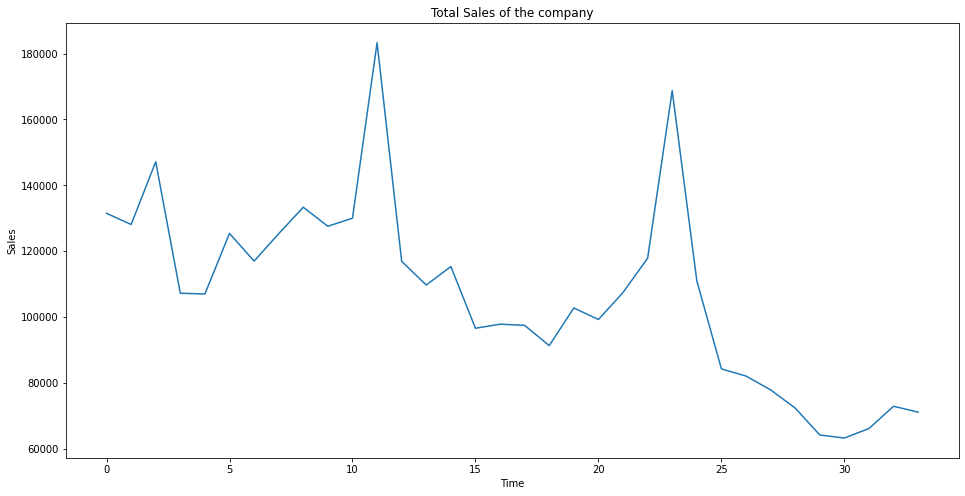

In [ ]:
ts=train3.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

## checking the closed shops



*   we need to check it beacuse of the negative trend





In [ ]:
sales_by_item_id = train3.pivot_table(index=['item_id'],values=['item_cnt_day'], 
                                        columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_item_id.columns = sales_by_item_id.columns.droplevel().map(str)
sales_by_item_id = sales_by_item_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_item_id.columns.values[0] = 'item_id'

In [ ]:
outdated_items = sales_by_item_id[sales_by_item_id.loc[:,'27':].sum(axis=1)==0]
print('Outdated items:', len(outdated_items))


Outdated items: 12391


In [ ]:
# test = pd.read_csv('test.csv')
print('Outdated items in test set:', len(test[test['item_id'].isin(outdated_items['item_id'])]))


Outdated items in test set: 6888


## check if item prices is unique for every item but 

after some research it apears that ,It's some how what we want to predict

In [ ]:
len(train3.item_price.unique()) #so every item have a different price we can take an average of it's prices for test data 

19993

In [ ]:
len(train3.item_id.unique()) #so every item have a different price we can take an average of it's prices for test data 

21807

In [ ]:
train3.item_id.max()

22169

In [ ]:
items_id=train3.item_id.unique()
item_to_price=dict()
# item_to_price[0]=1
if 0 in item_to_price:
  print(True)
# item_prices=np.zeros(shape=items_id.shape[0])
for item in items_id[0:50]:
  k=train3[train3.item_id==item].item_price.unique()
  print(k)
  print(np.sum(k)/len(k))

[999. 657. 299.]
651.6666666666666
[899. 949.]
924.0
[1709.05]
1709.05
[1099.  1098.7 1149. ]
1115.5666666666666
[349. 242. 249.]
280.0
[549.]
549.0
[239. 299. 183.]
240.33333333333334
[299. 249. 190.]
246.0
[399.    282.    378.9   378.7   319.    378.45  379.    398.95  398.975
 378.75  398.9   172.27  398.5   398.7   449.    330.    302.45 ]
361.26735294117645
[279. 155. 148.]
194.0
[299.  161.  239.2]
233.0666666666667
[279.   155.   161.   299.   283.95 239.2  173.   181.   190.   116.07
 298.75 283.9  284.05 284.  ]
230.56571428571434
[1699.  1698.5 1359.  1252.  1099. ]
1421.5
[1708.95 1799.  ]
1753.975
[299.]
299.0
[299.   284.05 161.  ]
248.01666666666665
[1649. 1699. 1949. 1999.]
1824.0
[1799.   1399.   1259.   1259.3  1798.5  1258.5   899.    899.5   981.32
 1028.06  899.75  946.87 1046.   1044.67]
1179.8907142857145
[899.   898.5  629.   698.   697.9  392.93 494.74 407.36 613.   349.  ]
607.943
[149.  94.]
121.5
[2699.   1699.   1199.   1698.5   749.    673.9   722.92  598.

In [ ]:
import gc
gc.collect()


2944211

In [ ]:
del sales_by_item_id
del train2 , train3 
del ts
del items_id
del outdated_items

#features from text

## tfidf and factorization features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import  NMF
import numpy as np

transformer=TfidfVectorizer(max_features=25)

items["item_name_len"]=items['item_name'].map(len)
items["item_name_cw"]=items['item_name'].map(lambda x: len(str(x).split(' ')))
tfidf_features=transformer.fit_transform(items['item_name']).toarray()
tfidf_features=pd.DataFrame(tfidf_features)
nmf = NMF(n_components=5, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200)
tfidf_features=pd.DataFrame(nmf.fit_transform(tfidf_features))
cols = tfidf_features.columns

for i in range(5):
  items['item_name_tfidf_'+str(i)]=tfidf_features[cols[i]]
  items['item_name_tfidf_'+str(i)]=items['item_name_tfidf_'+str(i)].astype(np.float32)

print(items.info())

items.drop('item_name',axis=1,inplace=True)
items["item_id"]=items["item_id"].astype(np.int16)
items['item_category_id'] = items['item_category_id'].astype(np.int8)
items["item_name_len"]=items["item_name_len"].astype(np.int16)
items["item_name_cw"]=items["item_name_cw"].astype(np.int8)

print(items.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_name          22170 non-null  object 
 1   item_id            22170 non-null  int64  
 2   item_category_id   22170 non-null  int64  
 3   item_name_len      22170 non-null  int64  
 4   item_name_cw       22170 non-null  int64  
 5   item_name_tfidf_0  22170 non-null  float32
 6   item_name_tfidf_1  22170 non-null  float32
 7   item_name_tfidf_2  22170 non-null  float32
 8   item_name_tfidf_3  22170 non-null  float32
 9   item_name_tfidf_4  22170 non-null  float32
dtypes: float32(5), int64(4), object(1)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            22170 non-null  int1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
transformer=TfidfVectorizer(max_features=25)

item_categories["item_category_name_len"]=item_categories['item_category_name'].map(len)
item_categories["item_category_name_cw"]=item_categories['item_category_name'].map(lambda x: len(str(x).split(' ')))
tfidf_features=transformer.fit_transform(item_categories['item_category_name']).toarray()
tfidf_features=pd.DataFrame(tfidf_features)
nmf = NMF(n_components=5, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200)
tfidf_features=pd.DataFrame(nmf.fit_transform(tfidf_features))
cols = tfidf_features.columns
for i in range(5):
  item_categories['item_category_name_tfidf_'+str(i)]=tfidf_features[cols[i]]
  item_categories['item_category_name_tfidf_'+str(i)]=item_categories['item_category_name_tfidf_'+str(i)].astype(np.float32)

print(item_categories.info())
item_categories.drop(['item_category_name','temp',"type","sub_type"],axis=1,inplace=True)# we have the label encoding for all of them and some of them tfidf also
item_categories['item_category_id'] = item_categories['item_category_id'].astype(np.int8)
item_categories["type_code"]=item_categories["type_code"].astype(np.int8)
item_categories["subtype_code"]=item_categories["subtype_code"].astype(np.int8)
item_categories["item_category_name_len"]=item_categories["item_category_name_len"].astype(np.int8)
item_categories["item_category_name_cw"]=item_categories["item_category_name_cw"].astype(np.int8)

print(item_categories.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   item_category_name          84 non-null     object 
 1   item_category_id            84 non-null     int64  
 2   temp                        84 non-null     object 
 3   type                        84 non-null     object 
 4   sub_type                    84 non-null     object 
 5   type_code                   84 non-null     int64  
 6   subtype_code                84 non-null     int64  
 7   item_category_name_len      84 non-null     int64  
 8   item_category_name_cw       84 non-null     int64  
 9   item_category_name_tfidf_0  84 non-null     float32
 10  item_category_name_tfidf_1  84 non-null     float32
 11  item_category_name_tfidf_2  84 non-null     float32
 12  item_category_name_tfidf_3  84 non-null     float32
 13  item_category_name_tfidf_4  84 non-nu

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
transformer=TfidfVectorizer(max_features=25)
# shop_name  
# item_categories=pd.read_csv("item_categories.csv")
shops["shop_name_len"]=shops['shop_name'].map(len)
shops["shop_name_cw"]=shops['shop_name'].map(lambda x: len(str(x).split(' ')))

tfidf_features=transformer.fit_transform(shops['shop_name']).toarray()
tfidf_features=pd.DataFrame(tfidf_features)
nmf = NMF(n_components=5, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200)
tfidf_features=pd.DataFrame(nmf.fit_transform(tfidf_features))
cols = tfidf_features.columns

for i in range(5):
  shops['shop_name_tfidf_'+str(i)]=tfidf_features[cols[i]]
  shops['shop_name_tfidf_'+str(i)]=shops['shop_name_tfidf_'+str(i)].astype(np.float32)

print(shops.info())
shops.drop(['shop_name','city'],axis=1,inplace=True)# we have the label encoding for all of them and some of them tfidf also
shops["shop_id"]=shops["shop_id"].astype(np.int8)
shops["city_code"]=shops["city_code"].astype(np.int8)
shops["shop_name_len"]=shops["shop_name_len"].astype(np.int8)
shops["shop_name_cw"]=shops["shop_name_cw"].astype(np.int8)

# items['item_name']
print(shops.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shop_name          60 non-null     object 
 1   shop_id            60 non-null     int64  
 2   city               60 non-null     object 
 3   city_code          60 non-null     int64  
 4   shop_name_len      60 non-null     int64  
 5   shop_name_cw       60 non-null     int64  
 6   shop_name_tfidf_0  60 non-null     float32
 7   shop_name_tfidf_1  60 non-null     float32
 8   shop_name_tfidf_2  60 non-null     float32
 9   shop_name_tfidf_3  60 non-null     float32
 10  shop_name_tfidf_4  60 non-null     float32
dtypes: float32(5), int64(4), object(2)
memory usage: 4.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sho

I tried to merge tfidf features with the rest of the data but my session crashed because of the ram again so I found that I will reduce the size of tfidf features , but I noticed that If i factorized it I will use all of the infromation and finish an other task from advanced features ||


after doing th above the session crashed again so I decided to do that befor the lagged features 

#remove dublicates

In [ ]:
# cols = train2.ctolumns
print(sales_train.duplicated().value_counts())
sales_train.drop_duplicates(inplace=True)

False    2935843
True           6
dtype: int64


#prepare for lagging feature 
to add lagging feature you will need to have every in every block how much every shop sell an item so that's why we using group by 

In [ ]:
from itertools import product

train1 = []
cols = ['date_block_num','shop_id','item_id']

for block_num in range(34):
    temp = sales_train[sales_train.date_block_num==block_num]
    train1.append(np.array(list(product([block_num], temp['shop_id'].unique(), temp['item_id'].unique()))))
    
print(sales_train.columns)
train1 = pd.DataFrame(np.vstack(train1), columns=cols)
train1["shop_id"]=train1["shop_id"].astype(np.int8)
train1["date_block_num"]=train1["date_block_num"].astype(np.int8)
train1["item_id"]=train1["item_id"].astype(np.int16)

train1.sort_values(cols,inplace=True);

train1.info()

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10913850 entries, 139255 to 10770511
Data columns (total 3 columns):
 #   Column          Dtype
---  ------          -----
 0   date_block_num  int8 
 1   shop_id         int8 
 2   item_id         int16
dtypes: int16(1), int8(2)
memory usage: 124.9 MB


In [ ]:
temp = sales_train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': ['sum']})
temp.columns = ['item_cnt_month']
temp.reset_index(inplace=True)

train1 = pd.merge(train1, temp, on=cols, how='left')
train1['item_cnt_month'] = (train1['item_cnt_month'].fillna(0).clip(0,20).astype(np.float16))
print(train1.shape)
train1.head()

(10913850, 4)


,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0
3,0,0,29,0.0
4,0,0,32,6.0


In [ ]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)

temp = pd.concat([train1, test], ignore_index=True, sort=False, keys=cols)
temp.fillna(0, inplace=True)
temp.drop("ID",axis=1,inplace=True)
print(temp.shape)


(11128050, 4)


In [ ]:
train_test_tfidf = pd.merge(temp, shops, on=['shop_id'], how='left')
train_test_tfidf = pd.merge(train_test_tfidf, items, on=['item_id'], how='left')
train_test_tfidf = pd.merge(train_test_tfidf, item_categories, on=['item_category_id'], how='left')

In [ ]:
del temp , train1 ,shops , items , item_categories

In [ ]:
train_test_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11128050 entries, 0 to 11128049
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   date_block_num              int8   
 1   shop_id                     int8   
 2   item_id                     int16  
 3   item_cnt_month              float16
 4   city_code                   int8   
 5   shop_name_len               int8   
 6   shop_name_cw                int8   
 7   shop_name_tfidf_0           float32
 8   shop_name_tfidf_1           float32
 9   shop_name_tfidf_2           float32
 10  shop_name_tfidf_3           float32
 11  shop_name_tfidf_4           float32
 12  item_category_id            int8   
 13  item_name_len               int16  
 14  item_name_cw                int8   
 15  item_name_tfidf_0           float32
 16  item_name_tfidf_1           float32
 17  item_name_tfidf_2           float32
 18  item_name_tfidf_3           float32
 19  item_name_tfidf_4  

here I've found that we have too much tfidf features so I needed to use matrix factorization to remove that

#lagged features

##merging table_code

These lagged features will be applied for a different combinations of features

this is a traditional time series analysis feature , It's inttion that we can predict the feature from the previous steps

for example lag = 1
from previous block

lag =2

from the block before the last

- date block 
- date block /item id 
- date block / shop id 
- date block / category
- date block / type code
- date block / city 
- date block / type code / subtype code 
- date block /item id/city code
- date block /city /shop id 
- date block / shop id / item id 
- date block /shop id / category 
- date block /shop id / type code 
- date block /shop id / type code /subtype code
- date block / shop id /city code

I've hevily commented the first , the rest I will just copy it 

In [ ]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id', col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        col+'_lag_'+str(i)
        shifted[col+'_lag_'+str(i)] = shifted[col+'_lag_'+str(i)].astype(np.float32)

        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [ ]:
temp = train_test_tfidf.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']}) 
# we generate a column vector with the mean values of each date block 
#when using group by the index of the dataframe is grouped by attribute here date block num but we don't want that so we can use it's value 
#so we reset index
#temp columns has no name so we name it after using we can drop it 
temp.columns = ['date_avg_item_cnt']          ###
temp ['date_avg_item_cnt'] = temp ['date_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_avg_item_cnt')
# you can notice in the lagged features the first date block will have no value because there is no previous block to lag it's value
train_test_tfidf.drop(['date_avg_item_cnt'], axis=1, inplace=True)
train_test_tfidf.head()

,date_block_num,shop_id,item_id,item_cnt_month,city_code,shop_name_len,shop_name_cw,shop_name_tfidf_0,shop_name_tfidf_1,shop_name_tfidf_2,shop_name_tfidf_3,shop_name_tfidf_4,item_category_id,item_name_len,item_name_cw,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,type_code,subtype_code,item_category_name_len,item_category_name_cw,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,date_avg_item_cnt_lag_1
0,0,0,19,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,40,25,3,0.003979,0.001085,0.0006,0.012256,0.000000,11,4,10,3,0.000000,0.0,0.011044,0.000000,0.067811,NaN
1,0,0,27,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,19,33,5,0.060709,0.000000,0.0000,0.000000,0.012783,5,10,10,3,0.007615,0.0,0.239206,0.061525,0.000000,NaN
2,0,0,28,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,30,39,6,0.058595,0.000000,0.0000,0.064149,0.002127,8,52,29,5,0.001793,0.0,0.329087,0.000000,0.029491,NaN
3,0,0,29,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,23,38,6,0.049977,0.000000,0.0000,0.000000,0.015838,5,16,15,4,0.008240,0.0,0.267676,0.148161,0.000000,NaN
4,0,0,32,6.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,40,3,1,0.000000,0.000000,0.0000,0.000000,0.000000,11,4,10,3,0.000000,0.0,0.011044,0.000000,0.067811,NaN


In [ ]:
#2-date block // item id 
temp = train_test_tfidf.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_item_avg_item_cnt']     ###
temp ['date_item_avg_item_cnt'] = temp ['date_item_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num','item_id'], how='left')
del temp
train_test_tfidf = lag_feature(train_test_tfidf, [1, 2, 3, 6, 12], 'date_item_avg_item_cnt')
train_test_tfidf.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)

#3-date block // shop id 
temp = train_test_tfidf.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_avg_item_cnt']     ###
temp ['date_shop_avg_item_cnt'] = temp ['date_shop_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num','shop_id'], how='left')
del temp

train_test_tfidf = lag_feature(train_test_tfidf, [1, 2, 3, 6, 12], 'date_shop_avg_item_cnt')
train_test_tfidf.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)

#4-date block // item category id  
temp = train_test_tfidf.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_cat_avg_item_cnt']      ###
temp ['date_cat_avg_item_cnt'] = temp ['date_cat_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num','item_category_id'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_cat_avg_item_cnt')
train_test_tfidf.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)
#5-date block //  type code   
temp = train_test_tfidf.groupby(['date_block_num', 'type_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_type_avg_item_cnt']     ###
temp ['date_type_avg_item_cnt'] = temp ['date_type_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num', 'type_code'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_type_avg_item_cnt')
train_test_tfidf.drop(['date_type_avg_item_cnt'], axis=1, inplace=True)

#6-date block //  city code   
temp = train_test_tfidf.groupby(['date_block_num', 'city_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_city_avg_item_cnt']     ###
temp ['date_city_avg_item_cnt'] = temp ['date_city_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num', 'city_code'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_city_avg_item_cnt')
train_test_tfidf.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)

#7- date block /item id/city code

temp = train_test_tfidf.groupby(['date_block_num', 'item_id','city_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_item_city_avg_item_cnt']     ###
temp ['date_item_city_avg_item_cnt'] = temp ['date_item_city_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num',"item_id", 'city_code'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_item_city_avg_item_cnt')
train_test_tfidf.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)
#8- date block /city /shop id 
temp = train_test_tfidf.groupby(['date_block_num', 'city_code',"shop_id"]).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_city_shop_avg_item_cnt']     ###
temp ['date_city_shop_avg_item_cnt'] = temp ['date_city_shop_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num', 'city_code',"shop_id"], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_city_shop_avg_item_cnt')
train_test_tfidf.drop(['date_city_shop_avg_item_cnt'], axis=1, inplace=True)
train_test_tfidf.head()

#9- Create 'date_subtype_avg_item_cnt'
temp = train_test_tfidf.groupby(['date_block_num', 'type_code','subtype_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_type_subtype_avg_item_cnt']     ###
temp ['date_type_subtype_avg_item_cnt'] = temp ['date_type_subtype_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num',"type_code", 'subtype_code'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_type_subtype_avg_item_cnt')
train_test_tfidf.drop(['date_type_subtype_avg_item_cnt'], axis=1, inplace=True)
train_test_tfidf.head()
#10- Create 'date_city_avg_item_cnt'
temp = train_test_tfidf.groupby(['date_block_num', 'city_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_city_avg_item_cnt']     ###
temp ['date_city_avg_item_cnt'] = temp ['date_city_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num', 'city_code'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_city_avg_item_cnt')
train_test_tfidf.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)

#11- date block / shop id / item id 

temp = train_test_tfidf.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_item_avg_item_cnt']   ###
temp ['date_shop_item_avg_item_cnt'] = temp ['date_shop_item_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_shop_item_avg_item_cnt')
train_test_tfidf.drop(['date_shop_item_avg_item_cnt'], axis=1, inplace=True)

#12-date block // shop id // item category id   
temp = train_test_tfidf.groupby(['date_block_num', 'shop_id', 'item_category_id']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_cat_avg_item_cnt']    ###
temp ['date_shop_cat_avg_item_cnt'] = temp ['date_shop_cat_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_shop_cat_avg_item_cnt')
train_test_tfidf.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)

#13-date block // shop id // type code   
temp = train_test_tfidf.groupby(['date_block_num', 'shop_id', 'type_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_type_avg_item_cnt']    ###
temp ['date_shop_type_avg_item_cnt'] = temp ['date_shop_type_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num', 'shop_id', 'type_code'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_shop_type_avg_item_cnt')
train_test_tfidf.drop(['date_shop_type_avg_item_cnt'], axis=1, inplace=True)


#14-date block /shop id / type code /subtype code
temp = train_test_tfidf.groupby(['date_block_num', 'shop_id', 'type_code','subtype_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_type_subtype_avg_item_cnt']    ###
temp ['date_shop_type_subtype_avg_item_cnt'] = temp ['date_shop_type_subtype_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num', 'shop_id', 'type_code',"subtype_code"], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_shop_type_subtype_avg_item_cnt')
train_test_tfidf.drop(['date_shop_type_subtype_avg_item_cnt'], axis=1, inplace=True)

#15- date block / shop id /city code
temp = train_test_tfidf.groupby(['date_block_num', 'shop_id', 'city_code']).agg({'item_cnt_month': ['mean']})
temp.columns = ['date_shop_city_avg_item_cnt']     ###
temp ['date_shop_city_avg_item_cnt'] = temp ['date_shop_city_avg_item_cnt'].astype(np.float32)          ###

temp.reset_index(inplace=True)
train_test_tfidf = pd.merge(train_test_tfidf, temp, on=['date_block_num', 'shop_id', 'city_code'], how='left')
train_test_tfidf = lag_feature(train_test_tfidf, [1], 'date_shop_city_avg_item_cnt')
train_test_tfidf.drop(['date_shop_city_avg_item_cnt'], axis=1, inplace=True)
data_lag_tfidf=train_test_tfidf

In [ ]:
del train_test_tfidf

In [ ]:
data_lag_tfidf.head()

,date_block_num,shop_id,item_id,item_cnt_month,city_code,shop_name_len,shop_name_cw,shop_name_tfidf_0,shop_name_tfidf_1,shop_name_tfidf_2,shop_name_tfidf_3,shop_name_tfidf_4,item_category_id,item_name_len,item_name_cw,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,type_code,subtype_code,item_category_name_len,item_category_name_cw,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,date_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_6,date_item_avg_item_cnt_lag_12,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt_lag_1,date_type_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1_x,date_item_city_avg_item_cnt_lag_1,date_city_shop_avg_item_cnt_lag_1,date_type_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1_y,date_shop_item_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,date_shop_type_avg_item_cnt_lag_1,date_shop_type_subtype_avg_item_cnt_lag_1,date_shop_city_avg_item_cnt_lag_1
0,0,0,19,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,40,25,3,0.003979,0.001085,0.0006,0.012256,0.000000,11,4,10,3,0.000000,0.0,0.011044,0.000000,0.067811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,19,33,5,0.060709,0.000000,0.0000,0.000000,0.012783,5,10,10,3,0.007615,0.0,0.239206,0.061525,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,30,39,6,0.058595,0.000000,0.0000,0.064149,0.002127,8,52,29,5,0.001793,0.0,0.329087,0.000000,0.029491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,23,38,6,0.049977,0.000000,0.0000,0.000000,0.015838,5,16,15,4,0.008240,0.0,0.267676,0.148161,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,40,3,1,0.000000,0.000000,0.0000,0.000000,0.000000,11,4,10,3,0.000000,0.0,0.011044,0.000000,0.067811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_lag_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11128050 entries, 0 to 11128049
Data columns (total 52 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   date_block_num                             int8   
 1   shop_id                                    int8   
 2   item_id                                    int16  
 3   item_cnt_month                             float16
 4   city_code                                  int8   
 5   shop_name_len                              int8   
 6   shop_name_cw                               int8   
 7   shop_name_tfidf_0                          float32
 8   shop_name_tfidf_1                          float32
 9   shop_name_tfidf_2                          float32
 10  shop_name_tfidf_3                          float32
 11  shop_name_tfidf_4                          float32
 12  item_category_id                           int8   
 13  item_name_len                           

#trend features

##we need to get the trend so we getting the trend from item prices and shops revenue
- to get that we calclate the mean item price for each item 
- calc the mean item price of each item in each month 
- if there is any trending item surely It's price will increase so there will be ad difference between the mean item price and it's price in this month 
- we get the difference / divide it by the mean price to normalize it 
- same process for the shops revenue

My ram was too small to handle all of the data, I reduced it , I removed the older 10 months

when we merge train3 and 4 we just merge the data of the training because reduced train contains only train data

In [ ]:
print(data_lag_tfidf.columns.values)

['date_block_num' 'shop_id' 'item_id' 'item_cnt_month' 'city_code'
 'shop_name_len' 'shop_name_cw' 'shop_name_tfidf_0' 'shop_name_tfidf_1'
 'shop_name_tfidf_2' 'shop_name_tfidf_3' 'shop_name_tfidf_4'
 'item_category_id' 'item_name_len' 'item_name_cw' 'item_name_tfidf_0'
 'item_name_tfidf_1' 'item_name_tfidf_2' 'item_name_tfidf_3'
 'item_name_tfidf_4' 'type_code' 'subtype_code' 'item_category_name_len'
 'item_category_name_cw' 'item_category_name_tfidf_0'
 'item_category_name_tfidf_1' 'item_category_name_tfidf_2'
 'item_category_name_tfidf_3' 'item_category_name_tfidf_4'
 'date_avg_item_cnt_lag_1' 'date_item_avg_item_cnt_lag_1'
 'date_item_avg_item_cnt_lag_2' 'date_item_avg_item_cnt_lag_3'
 'date_item_avg_item_cnt_lag_6' 'date_item_avg_item_cnt_lag_12'
 'date_shop_avg_item_cnt_lag_1' 'date_shop_avg_item_cnt_lag_2'
 'date_shop_avg_item_cnt_lag_3' 'date_shop_avg_item_cnt_lag_6'
 'date_shop_avg_item_cnt_lag_12' 'date_cat_avg_item_cnt_lag_1'
 'date_type_avg_item_cnt_lag_1' 'date_city_avg_it

In [ ]:
# Trend features for prices
temp = sales_train.groupby(['item_id']).agg({'item_price': ['mean']})
temp.columns = ['item_avg_item_price']
temp["item_avg_item_price"]=temp["item_avg_item_price"].astype(np.float32)
temp.reset_index(inplace=True)
data_lag_tfidf_trend = pd.merge(data_lag_tfidf, temp, on=['item_id'], how='left')
print("1")
temp = sales_train.groupby(['date_block_num','item_id']).agg({'item_price': ['mean']})
temp.columns = ['date_item_avg_item_price']
temp["date_item_avg_item_price"]=temp["date_item_avg_item_price"].astype(np.float32)

temp.reset_index(inplace=True)
data_lag_tfidf_trend = pd.merge(data_lag_tfidf_trend, temp, on=['date_block_num','item_id'], how='left')
print("2")
lags = [1,2,3]
data_lag_tfidf_trend = lag_feature(data_lag_tfidf_trend, lags, 'date_item_avg_item_price')
print("3")
for i in lags:
    data_lag_tfidf_trend['delta_price_lag_'+str(i)] = \
    (data_lag_tfidf_trend['date_item_avg_item_price_lag_'+str(i)] - data_lag_tfidf_trend['item_avg_item_price']) / data_lag_tfidf_trend['item_avg_item_price']
    data_lag_tfidf_trend['delta_price_lag_'+str(i)].fillna(0, inplace=True)
    


1
2
3


In [ ]:
# Trend features for revenue
sales_train['sales'] = sales_train['item_cnt_day']*sales_train['item_price']
temp = sales_train.groupby(['date_block_num','shop_id']).agg({'sales': ['sum']})
temp.columns = ['date_shop_revenue']
temp.reset_index(inplace=True)
data_lag_tfidf_trend = pd.merge(data_lag_tfidf_trend, temp, on=['date_block_num','shop_id'], how='left')

temp = data_lag_tfidf_trend.groupby(['shop_id']).agg({'date_shop_revenue': ['mean']})
temp.columns = ['shop_avg_revenue']
temp.reset_index(inplace=True)
data_lag_tfidf_trend = pd.merge(data_lag_tfidf_trend, temp, on=['shop_id'], how='left')

data_lag_tfidf_trend['delta_revenue'] = (data_lag_tfidf_trend['date_shop_revenue'] - data_lag_tfidf_trend['shop_avg_revenue']) / data_lag_tfidf_trend['shop_avg_revenue']
data_lag_tfidf_trend = lag_feature(data_lag_tfidf_trend, [1], 'delta_revenue')
data_lag_tfidf_trend.drop(['date_shop_revenue','shop_avg_revenue','delta_revenue'], axis=1, inplace=True)

In [ ]:
print(data_lag_tfidf_trend.head())
data_lag_tfidf_trend['delta_revenue_lag_1'] = data_lag_tfidf_trend['delta_revenue_lag_1'].fillna(0.0)
print(data_lag_tfidf_trend.shape)
data_lag_tfidf_trend.head()

   date_block_num  shop_id  ...  delta_price_lag_3  delta_revenue_lag_1
0               0        0  ...                0.0                  NaN
1               0        0  ...                0.0                  NaN
2               0        0  ...                0.0                  NaN
3               0        0  ...                0.0                  NaN
4               0        0  ...                0.0                  NaN

[5 rows x 61 columns]
(11128050, 61)


,date_block_num,shop_id,item_id,item_cnt_month,city_code,shop_name_len,shop_name_cw,shop_name_tfidf_0,shop_name_tfidf_1,shop_name_tfidf_2,shop_name_tfidf_3,shop_name_tfidf_4,item_category_id,item_name_len,item_name_cw,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,type_code,subtype_code,item_category_name_len,item_category_name_cw,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,date_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_6,date_item_avg_item_cnt_lag_12,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt_lag_1,date_type_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1_x,date_item_city_avg_item_cnt_lag_1,date_city_shop_avg_item_cnt_lag_1,date_type_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1_y,date_shop_item_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,date_shop_type_avg_item_cnt_lag_1,date_shop_type_subtype_avg_item_cnt_lag_1,date_shop_city_avg_item_cnt_lag_1,item_avg_item_price,date_item_avg_item_price,date_item_avg_item_price_lag_1,date_item_avg_item_price_lag_2,date_item_avg_item_price_lag_3,delta_price_lag_1,delta_price_lag_2,delta_price_lag_3,delta_revenue_lag_1
0,0,0,19,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,40,25,3,0.003979,0.001085,0.0006,0.012256,0.000000,11,4,10,3,0.000000,0.0,0.011044,0.000000,0.067811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,28.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,0,0,27,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,19,33,5,0.060709,0.000000,0.0000,0.000000,0.012783,5,10,10,3,0.007615,0.0,0.239206,0.061525,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1461.228516,2325.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,0,0,28,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,30,39,6,0.058595,0.000000,0.0000,0.064149,0.002127,8,52,29,5,0.001793,0.0,0.329087,0.000000,0.029491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.010468,549.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,0,0,29,0.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,23,38,6,0.049977,0.000000,0.0000,0.000000,0.015838,5,16,15,4,0.008240,0.0,0.267676,0.148161,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.285767,2397.500000,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,0,0,32,6.0,29,29,4,0.016938,0.0,0.0,0.0,0.103425,40,3,1,0.000000,0.000000,0.0000,0.000000,0.000000,11,4,10,3,0.000000,0.0,0.011044,0.000000,0.067811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.629242,338.110352,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
data_lag_tfidf_trend.head()

In [ ]:
# df1.reset_index(inplace=True)
from sklearn.model_selection import KFold, StratifiedKFold
cat_features = ["item_cnt_month",'shop_id', 'item_id', 'city_code', 'item_category_id', 'type_code', 'subtype_code']
temp=data_lag_tfidf_trend[cat_features]
cv = KFold(n_splits=5, shuffle=False)
new_features = []

check = False
for train_idx, valid_idx in cv.split(temp):
    
    # Train/validation split
    X_train, X_valid = temp.iloc[train_idx,:], temp.iloc[valid_idx,:]
    
    # Mean encoding
    for col in cat_features[1:]:
        means = X_valid[col].map(X_train.groupby(col).item_cnt_month.mean())
        col_new = col+'_target_enc'
        X_valid[col_new] = means
        
        # Results
        temp.loc[valid_idx, col_new] = X_valid
        
        # Store new columns
        if check==False:
            new_features.append(col_new)
    
    check = True

print(new_features)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

['shop_id_target_enc', 'item_id_target_enc', 'city_code_target_enc', 'item_category_id_target_enc', 'type_code_target_enc', 'subtype_code_target_enc']


In [ ]:
new_features = ['shop_id_target_enc', 'item_id_target_enc', 'city_code_target_enc',
                'item_category_id_target_enc', 'type_code_target_enc', 'subtype_code_target_enc']
prior = np.mean(temp['item_cnt_month'].values)
temp[new_features] = temp[new_features].fillna(prior)
temp.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,item_cnt_month,shop_id,item_id,city_code,item_category_id,type_code,subtype_code,shop_id_target_enc,item_id_target_enc,city_code_target_enc,item_category_id_target_enc,type_code_target_enc,subtype_code_target_enc
0,0.0,0,19,29,40,11,4,0.29248,0.292480,0.461426,0.237183,0.208618,0.237183
1,0.0,0,27,29,19,5,10,0.29248,0.049042,0.461426,0.654785,0.629395,0.612793
2,0.0,0,28,29,30,8,52,0.29248,0.144653,0.461426,1.048828,0.567383,1.048828
3,0.0,0,29,29,23,5,16,0.29248,0.030304,0.461426,0.630371,0.629395,0.615234
4,6.0,0,32,29,40,11,4,0.29248,0.863770,0.461426,0.237183,0.208618,0.237183


#draft 

In [ ]:
train_tfidf = pd.merge(sales_train, items, how='left', on='item_id')
train_tfidf = pd.merge(train_tfidf, shops, how='left', on='shop_id')
train_tfidf = pd.merge(train_tfidf, item_categories, how='left', on='item_category_id')

train_tfidf.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_name_len,item_name_cw,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,item_name_tfidf_5,item_name_tfidf_6,item_name_tfidf_7,item_name_tfidf_8,item_name_tfidf_9,item_name_tfidf_10,item_name_tfidf_11,item_name_tfidf_12,item_name_tfidf_13,item_name_tfidf_14,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24,shop_name,city,city_code,shop_name_len,shop_name_cw,...,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24,item_category_name,temp,type,sub_type,type_code,subtype_code,item_category_name_len,item_category_name_cw,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,item_category_name_tfidf_5,item_category_name_tfidf_6,item_category_name_tfidf_7,item_category_name_tfidf_8,item_category_name_tfidf_9,item_category_name_tfidf_10,item_category_name_tfidf_11,item_category_name_tfidf_12,item_category_name_tfidf_13,item_category_name_tfidf_14,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,17,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,30,22,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Кино - Blu-Ray,"[Кино , Blu, Ray]",Кино,Blu,11,1,14,3,0.0,0.603779,0.0,0.0,0.0,0.0,0.0,0.0,0.603779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.520482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,40,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.634153,0.0,0.560172,0.0,0.0,0.53297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"Москва ТРК ""Атриум""",Москва,13,19,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Музыка - Винил,"[Музыка , Винил]",Музыка,Винил,13,27,14,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,40,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.634153,0.0,0.560172,0.0,0.0,0.53297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"Москва ТРК ""Атриум""",Москва,13,19,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Музыка - Винил,"[Музыка , Винил]",Музыка,Винил,13,27,14,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,40,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,"Москва ТРК ""Атриум""",Москва,13,19,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Музыка - Винил,"[Музыка , Винил]",Музыка,Винил,13,27,14,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,39,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.691585,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722295,0.0,"Москва ТРК ""Атриум""",Москва,13,19,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Музыка - CD фирменного производства,"[Музыка , CD фирменного производства]",Музыка,CD фирменного производства,13,3,35,5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
cols=[]  
for i in range(0,25):
  cols.append('shop_name_tfidf_'+str(i))
  cols.append('item_name_tfidf_'+str(i))
  cols.append('item_category_name_tfidf_'+str(i))
new_cols =[]
for i in range(0,15):
  new_cols.append("tfidf_decompose_"+str(i))

### Matrix decompusition for train

In [ ]:
from sklearn.decomposition import  NMF
nmf = NMF(n_components=15, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200)
nmf.fit(train_tfidf[cols]);
temp = pd.DataFrame(nmf.transform(train_tfidf[cols]))
print("before renaming columns")
print(temp.head())
temp.columns=[new_cols]
print("after renaming columns")
print(temp.head())

before renaming columns
         0    1         2    3         4   ...   10   11   12        13        14
0  0.000000  0.0  0.000000  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000
1  0.000693  0.0  0.035581  0.0  0.000795  ...  0.0  0.0  0.0  0.026307  0.000000
2  0.000693  0.0  0.035581  0.0  0.000795  ...  0.0  0.0  0.0  0.026307  0.000000
3  0.000000  0.0  0.032467  0.0  0.000000  ...  0.0  0.0  0.0  0.026334  0.000051
4  0.000704  0.0  0.036369  0.0  0.000645  ...  0.0  0.0  0.0  0.026301  0.000000

[5 rows x 15 columns]
after renaming columns
  tfidf_decompose_0 tfidf_decompose_1  ... tfidf_decompose_13 tfidf_decompose_14
0          0.000000               0.0  ...           0.000000           0.000000
1          0.000693               0.0  ...           0.026307           0.000000
2          0.000693               0.0  ...           0.026307           0.000000
3          0.000000               0.0  ...           0.026334           0.000051
4          0.000704              

In [ ]:
print("train shape before concatinatt")
print(train_tfidf.shape)
train_tfidf=pd.concat([train_tfidf, temp], axis=1)
print("train shape after concatinatt")
train_tfidf=train_tfidf.drop(cols,axis=1)
print("train shape after dropping the old tfidf columns")
print(train_tfidf.shape)
del temp

train shape before concatinatt
(2935849, 98)
train shape after concatinatt
train shape after dropping the old tfidf columns
(2935849, 38)


In [ ]:
print("before removing redudnt columns")
print(train_tfidf.head(3))

train_tfidf=train_tfidf.drop(['item_name',"shop_name",'city','item_category_name','temp','type',"sub_type"],axis=1)# we have the label encoding for all of them and some of them tfidf also
print("after removing redudnt columns")
print(train_tfidf.head(3))


before removing redudnt columns
         date  date_block_num  ...  (tfidf_decompose_13,)  (tfidf_decompose_14,)
0  02.01.2013               0  ...               0.000000                    0.0
1  03.01.2013               0  ...               0.026307                    0.0
2  05.01.2013               0  ...               0.026307                    0.0

[3 rows x 38 columns]
after removing redudnt columns
         date  date_block_num  ...  (tfidf_decompose_13,)  (tfidf_decompose_14,)
0  02.01.2013               0  ...               0.000000                    0.0
1  03.01.2013               0  ...               0.026307                    0.0
2  05.01.2013               0  ...               0.026307                    0.0

[3 rows x 31 columns]


### checking the maximum value for each column 

we want to do this to downcast the values so we can reduce the memory used

In [ ]:
print(train_tfidf['date_block_num'].max())
print(train_tfidf['shop_id'].max())
print(train_tfidf['item_id'].max())
print(train_tfidf["item_price"].max())
print(train_tfidf["item_cnt_day"].max())
print(train_tfidf["item_category_id"].max())
print(train_tfidf['item_name_len'].max())
print(train_tfidf['item_name_cw'].max())
print(train_tfidf['city_code'].max())
print(train_tfidf['shop_name_len'].max())
print(train_tfidf['shop_name_cw'].max())
print(train_tfidf['type_code'].max())
print(train_tfidf['subtype_code'].max())
print(train_tfidf['item_category_name_len'].max())
print(train_tfidf['item_category_name_cw'].max())
# item_category_name
#all of them integer 8 expect item name len and item id  will be integer 16
# #we have 2 floats item price , item_cnt_day

33
59
22169
307980.0
2169.0
83
150
29
30
47
6
19
58
40
7


In [ ]:
a=train_tfidf.columns.values
print(type(a))
for k in a[-15:]:
  
  print(train_tfidf[k].max())
  train_tfidf[k]=train_tfidf[k].astype(np.float32)
  print(train_tfidf[k].max())
train_tfidf["shop_id"]=train_tfidf["shop_id"].astype(np.int8)
train_tfidf["item_id"]=train_tfidf["item_id"].astype(np.int16)
train_tfidf["date_block_num"]=train_tfidf["date_block_num"].astype(np.int8)
train_tfidf['item_category_id'] = train_tfidf['item_category_id'].astype(np.int8)
train_tfidf["item_name_len"]=train_tfidf["item_name_len"].astype(np.int16)
train_tfidf["item_name_cw"]=train_tfidf["item_name_cw"].astype(np.int8)
train_tfidf["city_code"]=train_tfidf["city_code"].astype(np.int8)
train_tfidf["shop_name_len"]=train_tfidf["shop_name_len"].astype(np.int8)
train_tfidf["shop_name_cw"]=train_tfidf["shop_name_cw"].astype(np.int8)
train_tfidf["type_code"]=train_tfidf["type_code"].astype(np.int8)
train_tfidf["subtype_code"]=train_tfidf["subtype_code"].astype(np.int8)
train_tfidf["item_category_name_len"]=train_tfidf["item_category_name_len"].astype(np.int8)
train_tfidf["item_category_name_cw"]=train_tfidf["item_category_name_cw"].astype(np.int8)


<class 'numpy.ndarray'>


## generating tfidf features for test set

### tfidf features for test

In [ ]:
# test_tfidf=train.merge
test_tfidf = pd.merge(test, items, how='left', on='item_id')
test_tfidf = pd.merge(test_tfidf, shops, how='left', on='shop_id')
test_tfidf = pd.merge(test_tfidf, item_categories, how='left', on='item_category_id')


### matrix decomposition for test

In [ ]:

temp = pd.DataFrame(nmf.transform(test_tfidf[cols]))
temp.columns=[new_cols]
test_tfidf=test_tfidf.drop(cols,axis=1)
test_tfidf=pd.concat([test_tfidf, temp], axis=1)
del temp

we have the label encoding for all of them and some of them tfidf also

In [ ]:
test_tfidf=test_tfidf.drop(["ID",'item_name',"shop_name",'city','item_category_name','temp','type',"sub_type"],axis=1)

checking if there is extra column in the training not in the test set 

item_price, item_cnt_day  this is what we want to predict

date_block_num date block for the test is 34 


date i will remove it from the training 

In [ ]:
print(test_tfidf.columns.values)#date , date_block_num  ,item_price, item_cnt_day
print(train_tfidf.columns.values)

['shop_id' 'item_id' 'item_category_id' 'item_name_len' 'item_name_cw'
 'city_code' 'shop_name_len' 'shop_name_cw' 'type_code' 'subtype_code'
 'item_category_name_len' 'item_category_name_cw' ('tfidf_decompose_0',)
 ('tfidf_decompose_1',) ('tfidf_decompose_2',) ('tfidf_decompose_3',)
 ('tfidf_decompose_4',) ('tfidf_decompose_5',) ('tfidf_decompose_6',)
 ('tfidf_decompose_7',) ('tfidf_decompose_8',) ('tfidf_decompose_9',)
 ('tfidf_decompose_10',) ('tfidf_decompose_11',) ('tfidf_decompose_12',)
 ('tfidf_decompose_13',) ('tfidf_decompose_14',)]
['date' 'date_block_num' 'shop_id' 'item_id' 'item_price' 'item_cnt_day'
 'item_category_id' 'item_name_len' 'item_name_cw' 'city_code'
 'shop_name_len' 'shop_name_cw' 'type_code' 'subtype_code'
 'item_category_name_len' 'item_category_name_cw' ('tfidf_decompose_0',)
 ('tfidf_decompose_1',) ('tfidf_decompose_2',) ('tfidf_decompose_3',)
 ('tfidf_decompose_4',) ('tfidf_decompose_5',) ('tfidf_decompose_6',)
 ('tfidf_decompose_7',) ('tfidf_decompose_8'

In [ ]:
test_tfidf['date_block_num'] = 34
test_tfidf['date_block_num'] = test_tfidf['date_block_num'].astype(np.int8)
train_tfidf=train_tfidf.drop('date',axis=1)#item_price, item_cnt_day
test_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   shop_id                 214200 non-null  int64  
 1   item_id                 214200 non-null  int64  
 2   item_category_id        214200 non-null  int64  
 3   item_name_len           214200 non-null  int64  
 4   item_name_cw            214200 non-null  int64  
 5   city_code               214200 non-null  int64  
 6   shop_name_len           214200 non-null  int64  
 7   shop_name_cw            214200 non-null  int64  
 8   type_code               214200 non-null  int64  
 9   subtype_code            214200 non-null  int64  
 10  item_category_name_len  214200 non-null  int64  
 11  item_category_name_cw   214200 non-null  int64  
 12  (tfidf_decompose_0,)    214200 non-null  float64
 13  (tfidf_decompose_1,)    214200 non-null  float64
 14  (tfidf_decompose_2,)

In [ ]:

test_tfidf["shop_id"]=test_tfidf["shop_id"].astype(np.int8)
test_tfidf["item_id"]=test_tfidf["item_id"].astype(np.int16)
test_tfidf["date_block_num"]=test_tfidf["date_block_num"].astype(np.int8)
test_tfidf['item_category_id'] = test_tfidf['item_category_id'].astype(np.int8)
test_tfidf["item_name_len"]=test_tfidf["item_name_len"].astype(np.int16)
test_tfidf["item_name_cw"]=test_tfidf["item_name_cw"].astype(np.int8)
test_tfidf["city_code"]=test_tfidf["city_code"].astype(np.int8)
test_tfidf["shop_name_len"]=test_tfidf["shop_name_len"].astype(np.int8)
test_tfidf["shop_name_cw"]=test_tfidf["shop_name_cw"].astype(np.int8)
test_tfidf["type_code"]=test_tfidf["type_code"].astype(np.int8)
test_tfidf["subtype_code"]=test_tfidf["subtype_code"].astype(np.int8)
test_tfidf["item_category_name_len"]=test_tfidf["item_category_name_len"].astype(np.int8)
test_tfidf["item_category_name_cw"]=test_tfidf["item_category_name_cw"].astype(np.int8)


In [ ]:
all_tfidf = pd.concat([train_tfidf, test_tfidf], ignore_index=True, sort=False, keys=cols)
all_tfidf.reset_index()
print(train_tfidf.shape)

all_tfidf.fillna(0, inplace=True) 
del train_tfidf , test_tfidf
all_tfidf.tail()


(2935849, 30)


,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_name_len,item_name_cw,city_code,shop_name_len,shop_name_cw,type_code,subtype_code,item_category_name_len,item_category_name_cw,"(tfidf_decompose_0,)","(tfidf_decompose_1,)","(tfidf_decompose_2,)","(tfidf_decompose_3,)","(tfidf_decompose_4,)","(tfidf_decompose_5,)","(tfidf_decompose_6,)","(tfidf_decompose_7,)","(tfidf_decompose_8,)","(tfidf_decompose_9,)","(tfidf_decompose_10,)","(tfidf_decompose_11,)","(tfidf_decompose_12,)","(tfidf_decompose_13,)","(tfidf_decompose_14,)"
3150044,34,45,18454,0.0,0.0,55,11,3,20,20,3,13,2,35,5,0.000000,0.000053,0.032164,0.000000,0.000000,0.000038,0.000281,0.013857,0.000091,0.0,0.000000,0.000000,0.000338,0.0,0.000000
3150045,34,45,16188,0.0,0.0,64,28,4,20,20,3,14,40,25,4,0.001811,0.000122,0.000021,0.000000,0.004275,0.027503,0.000087,0.013839,0.009179,0.0,0.000000,0.000000,0.008823,0.0,0.000000
3150046,34,45,15757,0.0,0.0,55,34,5,20,20,3,13,2,35,5,0.000000,0.000589,0.033425,0.000000,0.000000,0.000027,0.000135,0.013923,0.000075,0.0,0.000000,0.000000,0.000336,0.0,0.000000
3150047,34,45,19648,0.0,0.0,40,31,5,20,20,3,11,4,10,3,0.000153,0.047660,0.000270,0.000000,0.000112,0.000252,0.000000,0.013861,0.000319,0.0,0.000000,0.000000,0.000208,0.0,0.000000
3150048,34,45,969,0.0,0.0,37,22,5,20,20,3,11,1,14,3,0.000156,0.003948,0.000342,0.000185,0.000020,0.000083,0.043716,0.014194,0.000346,0.0,0.000291,0.000168,0.000235,0.0,0.000422
